<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/TASK4(Linear_regression_%2C_Lasso_and_Ridge_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**LOADING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Used Car Dataset.csv")


Mounted at /content/drive


In [ ]:
print(df.head())

   Unnamed: 0                                           car_name  \
0           0                    2017 Mercedes-Benz S-Class S400   
1           1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2           2                       2018 BMW X1 sDrive 20d xLine   
3           3                           2019 Kia Seltos GTX Plus   
4           4                    2019 Skoda Superb LK 1.8 TSI AT   

  registration_year insurance_validity fuel_type  seats  kms_driven  \
0            Jul-17      Comprehensive    Petrol      5       56000   
1            Jan-21      Comprehensive    Petrol      5       30615   
2            Sep-18      Comprehensive    Diesel      5       24000   
3            Dec-19      Comprehensive    Petrol      5       18378   
4            Aug-19      Comprehensive    Petrol      5       44900   

    ownsership transmission manufacturing_year  mileage(kmpl)  engine(cc)  \
0  First Owner    Automatic               2017           7.81      2996.0   
1  First O

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [ ]:
print(df.describe())

        Unnamed: 0         seats     kms_driven  mileage(kmpl)    engine(cc)  \
count  1553.000000   1553.000000    1553.000000    1550.000000  1.550000e+03   
mean    776.000000     91.480361   52841.931101     236.927277  1.471857e+10   
std     448.456798   2403.424060   40067.800347     585.964295  2.185629e+11   
min       0.000000      4.000000     620.000000       7.810000  5.000000e+00   
25%     388.000000      5.000000   30000.000000      16.342500  1.197000e+03   
50%     776.000000      5.000000   49134.000000      18.900000  1.462000e+03   
75%    1164.000000      5.000000   70000.000000      22.000000  1.995000e+03   
max    1552.000000  67000.000000  810000.000000    3996.000000  3.258640e+12   

       max_power(bhp)    torque(Nm)  price(in lakhs)  
count    1.550000e+03  1.549000e+03      1553.000000  
mean     1.471857e+10  1.423989e+04       166.141494  
std      2.185629e+11  9.666241e+04      3478.855090  
min      5.000000e+00  5.000000e+00         1.000000  
25% 

**Linear Regression model**

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression.

In [ ]:
X = df.drop("price(in lakhs)", axis=1)  # Adjust the target variable column name
y = df["price(in lakhs)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])


In [ ]:
# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)


In [ ]:
# Create Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test_numeric)

# Evaluate the model
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

Linear Regression Metrics:
Mean Squared Error: 29165891.49492181
Mean Absolute Error: 494.29453775125296
R-squared: -0.008596915571108976


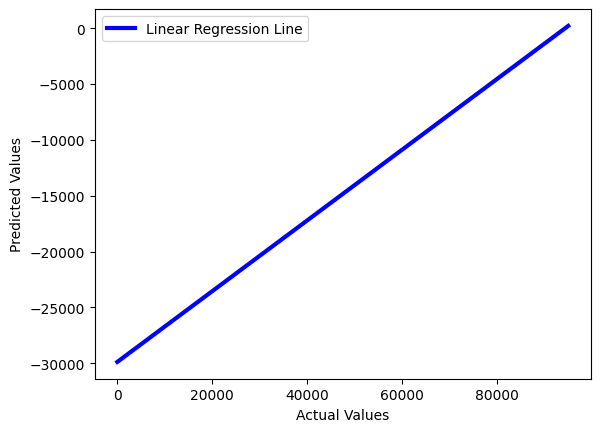

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# Assuming linear_reg_model is your trained linear regression model
slope = linear_reg_model.coef_[0]
intercept = linear_reg_model.intercept_

# Plot the linear regression line
plt.plot([min(y_test), max(y_test)], [max(y_test) * slope + intercept, min(y_test) * slope + intercept], color='blue', linewidth=3, label='Linear Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


**Lasso Regression model**

Lasso Regression – Lasso regression is another regularization technique that uses an L1 penalty term to shrink the coefficients of less important independent variables towards zero, effectively performing feature selection. The equation for lasso regression becomes

In [ ]:
# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)

# Create Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can tune alpha as needed

# Fit the model to the training data
lasso_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test_numeric)

# Evaluate the model
print("Lasso Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("R-squared:", r2_score(y_test, y_pred_lasso))


Lasso Regression Metrics:
Mean Squared Error: 29166011.819915503
Mean Absolute Error: 494.30483085552606
R-squared: -0.008601076576011835


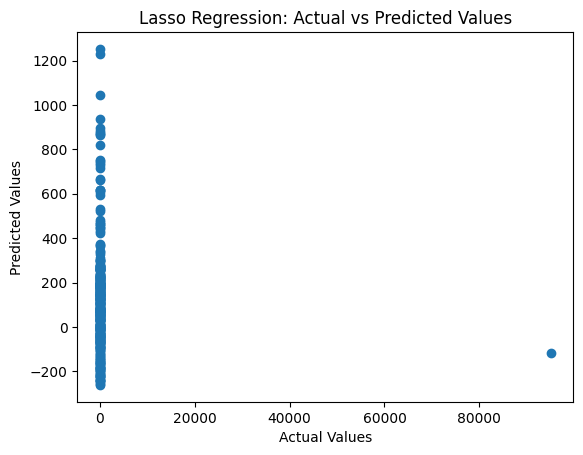

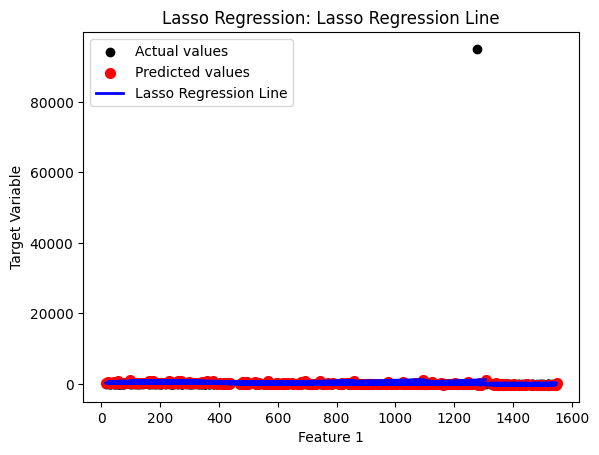

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.show()

# Plot the Lasso regression line
plt.scatter(X_test_numeric.iloc[:, 0], y_test, color='black', label='Actual values')
plt.scatter(X_test_numeric.iloc[:, 0], y_pred_lasso, color='red', linewidth=2, label='Predicted values')
plt.plot(X_test_numeric.iloc[:, 0], y_pred_lasso, color='blue', linewidth=2, label='Lasso Regression Line')
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title("Lasso Regression: Lasso Regression Line")
plt.legend()
plt.show()


**Ridge Regression model**

Ridge Regression – Ridge regression is a regularization technique used to prevent overfitting in linear regression models, especially when dealing with multiple independent variables. It introduces a penalty term to the least squares objective function, biasing the model towards solutions with smaller coefficients. The equation for ridge regression becomes

In [ ]:
# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha as needed

# Fit the model to the training data
ridge_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_numeric)

# Evaluate the model
print("Ridge Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R-squared:", r2_score(y_test, y_pred_ridge))


Ridge Regression Metrics:
Mean Squared Error: 29166014.972855393
Mean Absolute Error: 494.3067447373792
R-squared: -0.00860118560903933


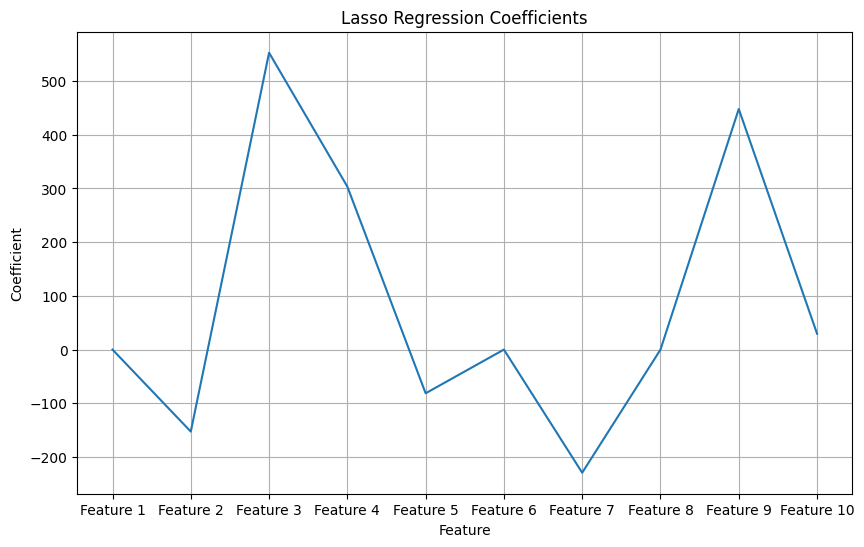

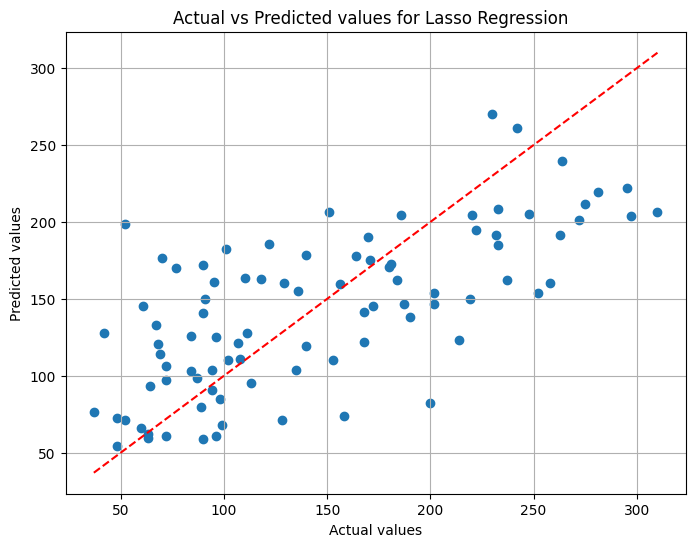

Mean Squared Error: 2798.193485169719


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load a sample dataset (for demonstration purposes)
X, y = datasets.load_diabetes(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
alpha = 0.1  # regularization parameter
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Extract coefficients
coef = lasso.coef_

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), [f'Feature {i+1}' for i in range(len(coef))])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.grid(True)
plt.show()

# Optionally, plot predicted vs actual values
y_pred = lasso.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Lasso Regression  ')
plt.grid(True)
plt.show()

# Optionally, print mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


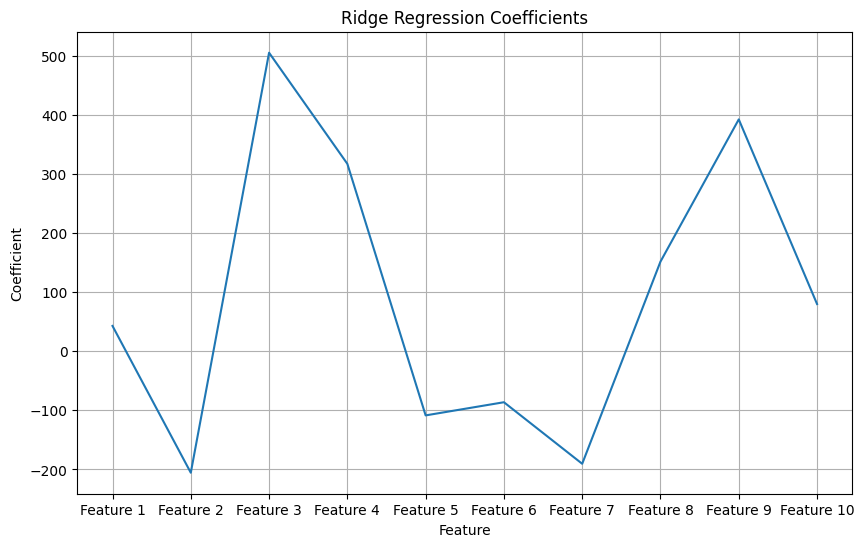

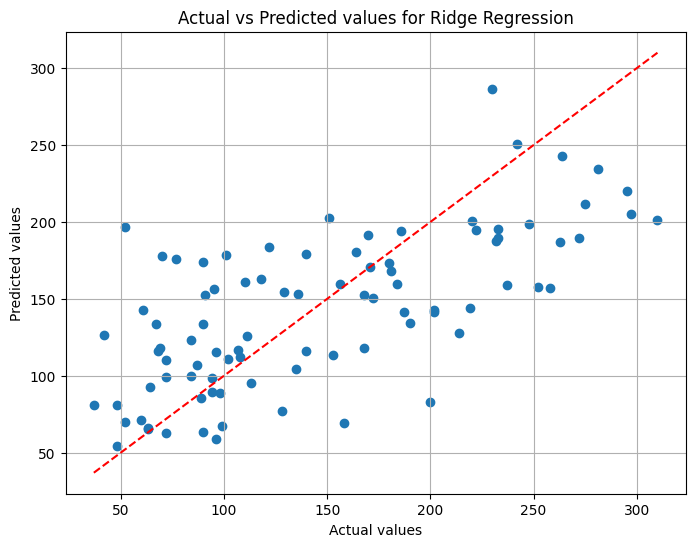

Mean Squared Error: 2856.4868876706537


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load a sample dataset (for demonstration purposes)
X, y = datasets.load_diabetes(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
alpha = 0.1  # regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Extract coefficients
coef = ridge.coef_

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), [f'Feature {i+1}' for i in range(len(coef))])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.grid(True)
plt.show()

# Optionally, plot predicted vs actual values
y_pred = ridge.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Ridge Regression')
plt.grid(True)
plt.show()

# Optionally, print mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
